In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Path gambar
img_path = 'img/strawberry_matang .jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (250, 300))

# Konversi warna img dan membuat gamma otomatis

In [3]:
def adjust_lightness(img_lab, gamma=1.0):
    """
    Menyesuaikan gamma hanya pada kanal L (lightness) di ruang warna LAB.
    """
    l_channel, a_channel, b_channel = cv2.split(img_lab)
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    l_channel_adjusted = cv2.LUT(l_channel, table)
    img_lab_adjusted = cv2.merge((l_channel_adjusted, a_channel, b_channel))
    return img_lab_adjusted
if img is None:
    print("Gagal memuat citra. Periksa path gambar.")
else:
    # Konversi ke LAB
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(img_lab)

# Masking warna merah dan gamma otomatis

Rata-rata intensitas: 97.52
Gamma yang disarankan: 1.00


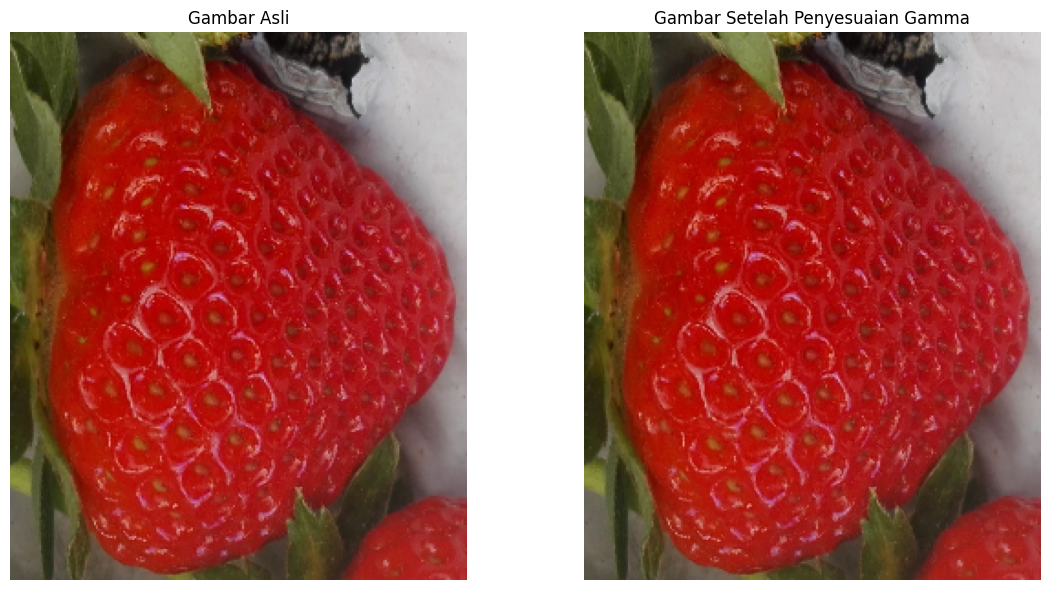

In [4]:
#terapkan gamma otomatis
mean_intensity = np.mean(l_channel)
target_intensity = 128 #intensitas target
gamma_suggested = target_intensity

# Batasi nilai gamma agar tidak terlalu ekstrem
gamma_suggested = min(1, max(0.7, gamma_suggested))

print(f"Rata-rata intensitas: {mean_intensity:.2f}")
print(f"Gamma yang disarankan: {gamma_suggested:.2f}")

# Terapkan penyesuaian gamma hanya pada kanal L
img_lab_adjusted = adjust_lightness(img_lab, gamma=gamma_suggested)
img_gamma = cv2.cvtColor(img_lab_adjusted, cv2.COLOR_LAB2BGR)


# Masking warna merah berdasarkan kanal a*
lower_red = 140
upper_red = 210
mask_red = cv2.inRange(a_channel, lower_red, upper_red)

# Masking warna kuning berdasarkan kanal b*
lower_yellow = 165
upper_yellow = 200
mask_yellow = cv2.inRange(b_channel, lower_yellow, upper_yellow)

# Gabungkan masking merah dan kuning
combined_mask = cv2.bitwise_or(mask_red, mask_yellow)

# Operasi morfologi untuk membersihkan noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
cleaned_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

# Visualisasi hasil gamma
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
ax[1].set_title("Gambar Setelah Penyesuaian Gamma")
ax[1].axis("off")

plt.tight_layout()
plt.show()

# Deteksi Tepi dengan Canny pada gambar hasil masking

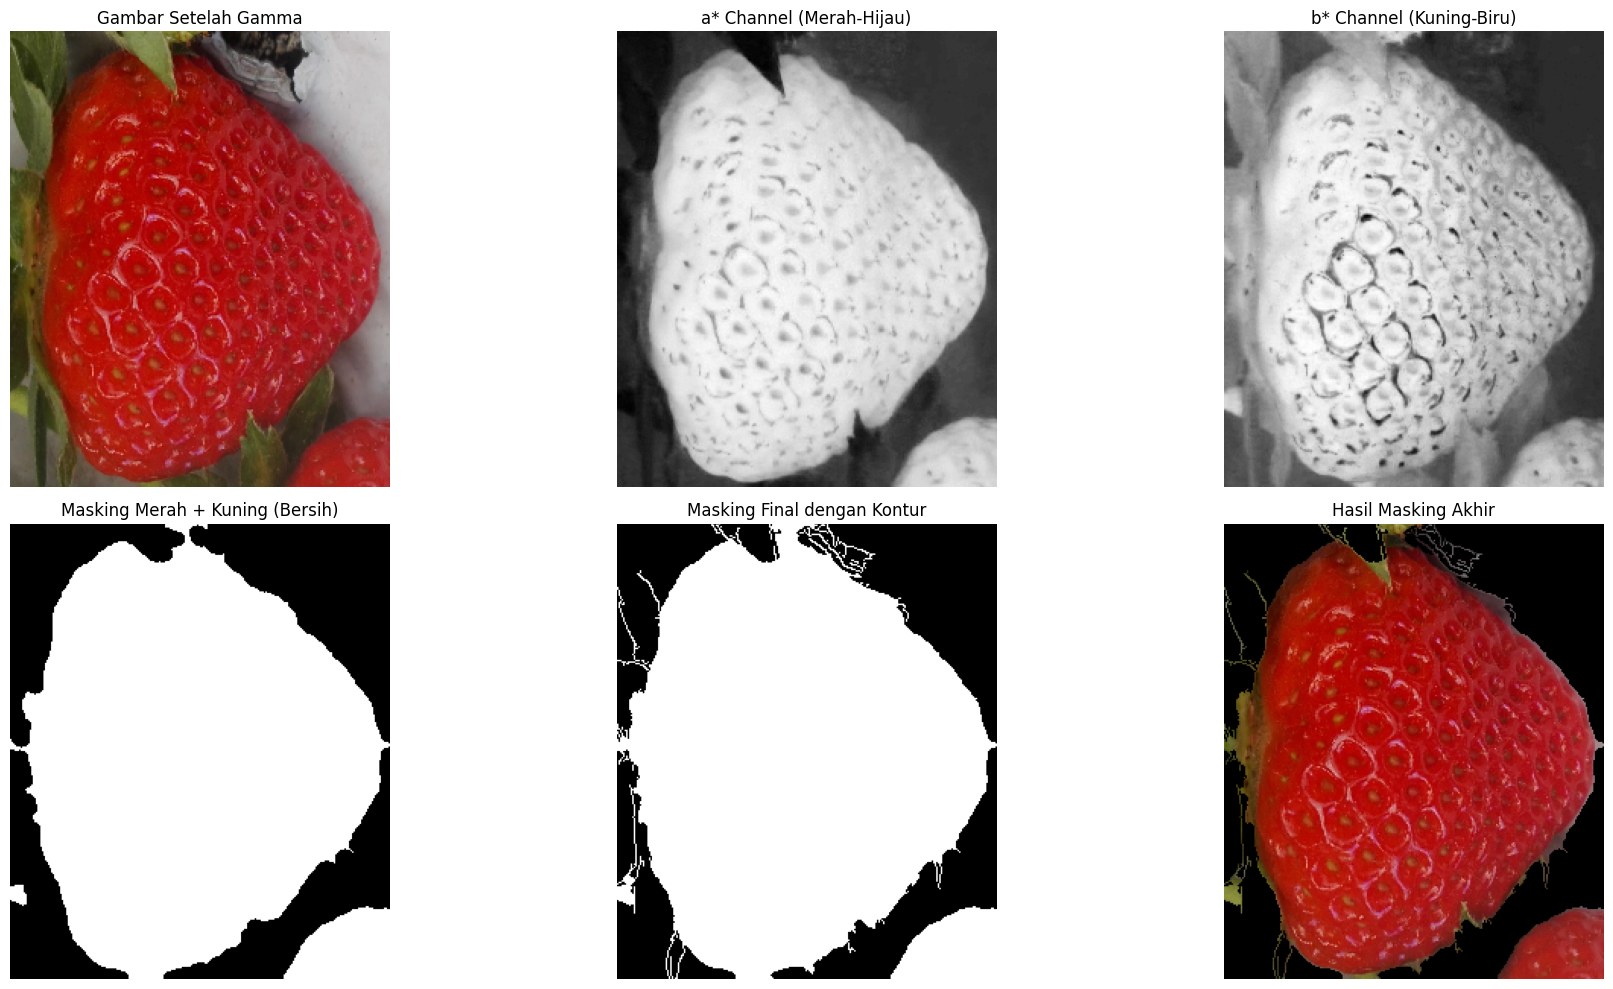

In [5]:
# Deteksi tepi menggunakan Canny
gray = cv2.cvtColor(img_gamma, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Gabungkan hasil masking dengan deteksi tepi
final_mask = cv2.bitwise_or(cleaned_mask, edges)

# Threshold biner untuk mendeteksi kontur
_, binary_img = cv2.threshold(final_mask, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter kontur berdasarkan luas minimum
min_area = 1000  # Luas minimum untuk menghindari deteksi kecil
fruit_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Masking akhir berdasarkan kontur terdeteksi
final_mask_contour = np.zeros_like(mask_red)
cv2.drawContours(final_mask_contour, fruit_contours, -1, (255), thickness=cv2.FILLED)

# Terapkan masking ke gambar asli
result = cv2.bitwise_and(img_gamma, img_gamma, mask=final_mask_contour)

# Visualisasi hasil
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    
ax[0, 0].imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Gambar Setelah Gamma")
ax[0, 0].axis("off")
    
ax[0, 1].imshow(a_channel, cmap="gray")
ax[0, 1].set_title("a* Channel (Merah-Hijau)")
ax[0, 1].axis("off")
    
ax[0, 2].imshow(b_channel, cmap="gray")
ax[0, 2].set_title("b* Channel (Kuning-Biru)")
ax[0, 2].axis("off")
    
ax[1, 0].imshow(cleaned_mask, cmap="gray")
ax[1, 0].set_title("Masking Merah + Kuning (Bersih)")
ax[1, 0].axis("off")
    
ax[1, 1].imshow(final_mask_contour, cmap="gray")
ax[1, 1].set_title("Masking Final dengan Kontur")
ax[1, 1].axis("off")
    
ax[1, 2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax[1, 2].set_title("Hasil Masking Akhir")
ax[1, 2].axis("off")
    
plt.tight_layout()
plt.show()

# Hitung Luas Area Strawberry

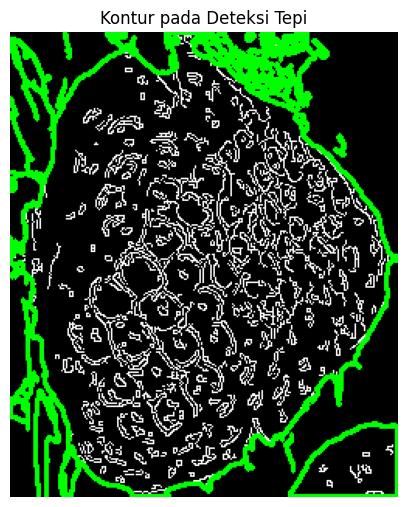

Luas masing-masing kontur buah strawberry (dalam piksel):
Buah 1: 5.00 piksel
Buah 2: 2388.00 piksel
Buah 3: 0.00 piksel
Buah 4: 7.00 piksel
Buah 5: 0.00 piksel
Buah 6: 1.00 piksel
Buah 7: 1.00 piksel
Buah 8: 7.50 piksel
Buah 9: 1.00 piksel
Buah 10: 7.00 piksel
Buah 11: 1.00 piksel
Buah 12: 3.00 piksel
Buah 13: 0.00 piksel
Buah 14: 0.00 piksel
Buah 15: 0.50 piksel
Buah 16: 0.50 piksel
Buah 17: 1.00 piksel
Buah 18: 1.50 piksel
Buah 19: 1.50 piksel
Buah 20: 1.00 piksel
Buah 21: 10.50 piksel
Buah 22: 0.00 piksel
Buah 23: 18.50 piksel
Buah 24: 2.00 piksel
Buah 25: 1.00 piksel
Buah 26: 75.00 piksel
Buah 27: 53.50 piksel
Buah 28: 3.00 piksel
Buah 29: 3.00 piksel
Buah 30: 49252.50 piksel
Buah 31: 2.50 piksel

Total luas semua buah strawberry: 51849.00 piksel


In [6]:
fruit_areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    fruit_areas.append(area)

# Total area of all detected contours
total_area = sum(fruit_areas)

# Visualize contours over the edge image
edge_with_contours = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
cv2.drawContours(edge_with_contours, contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(5, 7))
plt.imshow(cv2.cvtColor(edge_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Kontur pada Deteksi Tepi")
plt.axis("off")
plt.show()

# Print area results
print("Luas masing-masing kontur buah strawberry (dalam piksel):")
for i, area in enumerate(fruit_areas, start=1):
    print(f"Buah {i}: {area:.2f} piksel")

print(f"\nTotal luas semua buah strawberry: {total_area:.2f} piksel")


----    Hasil Perhitungan    ----
Total luas semua buah strawberry : 51849.00 piksel
Luas area merah : 50193.00 piksel
Persentase kematangan : 96.81%


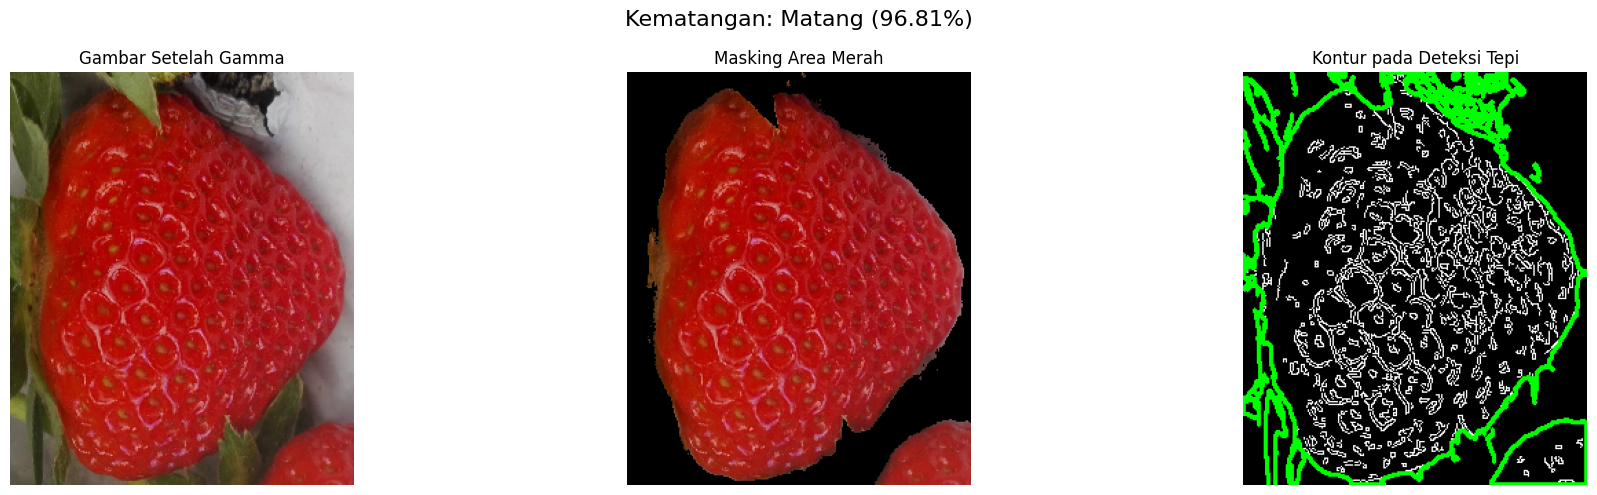

In [7]:
#hitung luas area merah pada mask_red
mask_red_contour = cv2.bitwise_and(mask_red, mask_red, mask=final_mask_contour)
red_area = cv2.countNonZero(mask_red_contour)

#hitung persentase kematangan
if total_area > 0 :
    maturity_persentase = (red_area /total_area) * 100
else :
    maturity_persentase = 0.0

#tampilkan hasil luas area dan persentase kematangan
print(f"\n----    Hasil Perhitungan    ----")
print(f"Total luas semua buah strawberry : {total_area:.2f} piksel")
print(f"Luas area merah : {red_area:.2f} piksel")
print(f"Persentase kematangan : {maturity_persentase:.2f}%")

#visualisasi masking area merah di atas gamabr asli
masked_red_area = cv2.bitwise_and(img_gamma, img_gamma, mask=mask_red)

#klasifikasi kematangan
if maturity_persentase >= 80:
    status_kematangan = "Matang"
elif 20 < maturity_persentase < 80:
    status_kematangan = "Setengah Matang"
else:
    status_kematangan = "Mentah"

# Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
ax[0].set_title("Gambar Setelah Gamma")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(masked_red_area, cv2.COLOR_BGR2RGB))
ax[1].set_title("Masking Area Merah")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(edge_with_contours, cv2.COLOR_BGR2RGB))
ax[2].set_title("Kontur pada Deteksi Tepi")
ax[2].axis("off")

plt.suptitle(f"Kematangan: {status_kematangan} ({maturity_persentase:.2f}%)", fontsize=16)
plt.tight_layout()
plt.show()


--- Hasil Perhitungan ---
Total piksel pada gambar asli: 75000 piksel
Luas area merah (dalam piksel): 50193 piksel
Persentase kematangan: 66.92%


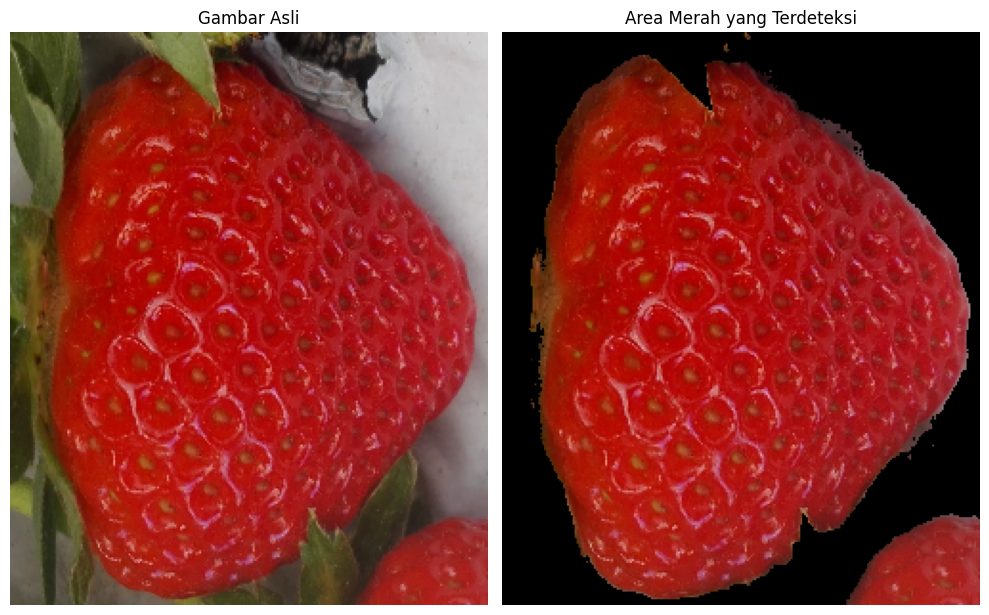

In [8]:
# Hitung total piksel pada gambar asli
height, width, _ = img.shape
total_pixels = height * width

# Hitung luas area merah (masking merah)
red_area = cv2.countNonZero(mask_red)

# Hitung persentase kematangan
if total_pixels > 0:  # Hindari pembagian dengan nol
    maturity_percentage = (red_area / total_pixels) * 100
else:
    maturity_percentage = 0.0

# Tampilkan hasil
print("\n--- Hasil Perhitungan ---")
print(f"Total piksel pada gambar asli: {total_pixels} piksel")
print(f"Luas area merah (dalam piksel): {red_area} piksel")
print(f"Persentase kematangan: {maturity_percentage:.2f}%")

# Visualisasi masking merah di atas gambar asli
masked_red_area = cv2.bitwise_and(img, img, mask=mask_red)

# Tampilkan hasil masking merah
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_red_area, cv2.COLOR_BGR2RGB))
plt.title("Area Merah yang Terdeteksi")
plt.axis("off")

plt.tight_layout()
plt.show()


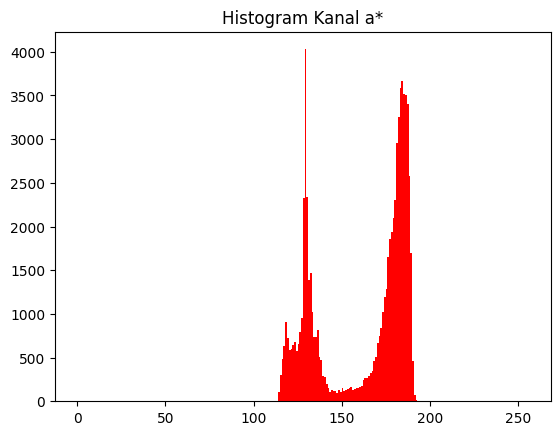

In [9]:
plt.hist(a_channel.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Histogram Kanal a*")
plt.show()